# MOVIE RECOMMENDATION SYSTEM
I'm building a baseline Movie Recommendation System using the <a href="https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata">TMDB 5000 Movie Dataset</a>.

## Importing Libraries

In [4]:
# Importing libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

---
## Loading the datasets
Here, let's load the TMDB 5000 Movie Dataset.

In [5]:
# Loading the datasets

df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

In [6]:
df1.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


---
## Merging the datasets into one
Now, I'll join the 2 datasets on the 'id' column.

In [8]:
df1.columns = ['id','ttitle','cast','crew']
df2 = df2.merge(df1, on='id')

In [9]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,ttitle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


---

## Demographic Filtering
Out of the three recommender systems, I'm implementing Demographic Filtering in this project. 

So, I'll be using IMDB's Weighted Rating :-<br>

<img src="./imdb formula weighted rating.png" alt="formula pic">

where
<ul>
    <li><strong>v</strong> is the number of votes for the movie</li>
   <li><strong>m</strong> is the minimum votes required to be listed in the chart</li>
    <li><strong>R</strong> is the average rating of the movie</li>
    <li><strong>C</strong> is the mean vote across the whole report</li>
    
<br>Since we already have v (vote_count) and R (vote_average), we'll calculate C and m.

In [10]:
C = df2['vote_average'].mean()
C

6.092171559442011

So, the mean rating for all the movies is approximately 6 on a scale of 10. Now, I'll determine the value of <strong>m</strong>, the minimum votes required to be listed in the chart. Let's use 90th percentile as the cutoff (a movie must have more votes than at least 90% of the movies in the list to feature in the charts).

<br>

In [11]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

A movie must have more than 1838 votes to feature in the charts.

<br>
Now, we'll see how many movies qualify.

In [12]:
s_movies = df2.copy().loc[df2['vote_count'] >= m]
s_movies.shape

(481, 23)

481 movies qualify to be in the list.

<br>

### Weighted Rating function

Now, I'll create a function which will calculate the score based on the Weighted Rating formula that we are using.

In [13]:
def weighted_rating(x, m=m , C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    # Calculation based on IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

Define a new feature 'calc_score' and calculate its value with the function 'weighted_rating()'.

In [14]:
s_movies['calc_score'] = s_movies.apply(weighted_rating, axis=1)

<br>

Now, we'll sort the DataFrame based on the new calculated score and output the title, vote count, vote average, and weighted rating (calc_score) of the movies.

In [27]:
# Now, sort movies based on calculated score above

s_movies = s_movies.sort_values('calc_score',ascending=False)

s_movies[['title','vote_count','vote_average','calc_score']]

,title,vote_count,vote_average,calc_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
41,Green Lantern,2487,5.1,5.521697
337,A Good Day to Die Hard,3493,5.2,5.507643
193,After Earth,2532,5.0,5.459420
91,Independence Day: Resurgence,2491,4.9,5.406234


---

## TOP 10 MOVIES

In [29]:
# The TOP 10 movies

s_movies[['title','vote_count','vote_average','calc_score']].head(10)

,title,vote_count,vote_average,calc_score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


---
## MOST POPULAR MOVIES

Text(0.5, 1.0, 'Most Popular Movies')

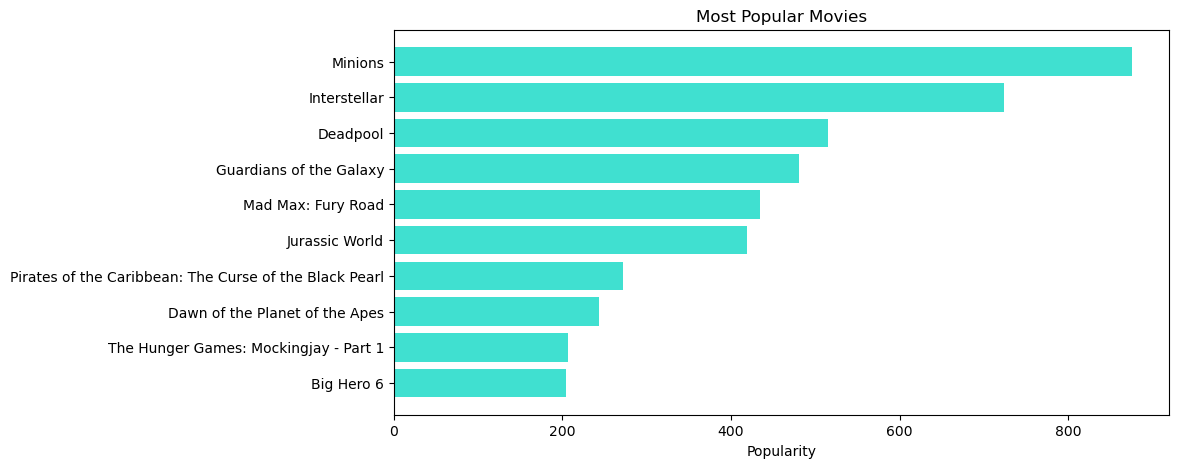

In [77]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))

plt.barh(pop['title'].head(10),pop['popularity'].head(10)   ,    color='turquoise')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Most Popular Movies")